In [8]:
from segmenter_api.utils.file import get_project_dir

%cd {get_project_dir()}
print(get_project_dir())

/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api
/home/yoshino_teppei/ghq/github.com/Tyaba/segmenter-api


In [9]:
from pathlib import Path

from PIL import Image

from segmenter_api.di import resolve
from segmenter_api.domain.factory.detector_factory import (
    DetectorType,
)
from segmenter_api.domain.factory.segmenter_factory import (
    SegmenterType,
)
from segmenter_api.usecase.service.text2segment import (
    Text2SegmentInput,
    Text2SegmentUsecase,
)
from segmenter_api.utils.image import draw_bboxes

In [10]:
image_path = Path("data/multiple_products.png")
image = Image.open(image_path)

In [11]:
text2segment_usecase = resolve(Text2SegmentUsecase)

In [12]:
text2segment_output = text2segment_usecase.text2segment(
    text2segment_input=Text2SegmentInput(
        texts=["left cosmetic", "center cosmetic", "right cosmetic"],
        image=image,
        detector_type=DetectorType.GROUNDING_DINO,
        segmenter_type=SegmenterType.SAM2,
    )
)

{"severity": "INFO", "timestamp": "2025-04-16_07:45:33", "message": "関数Text2SegmentUsecase.text2segmentが開始"}


INFO:segmenter_api.utils.time:関数Text2SegmentUsecase.text2segmentが開始


{"severity": "INFO", "timestamp": "2025-04-16_07:45:38", "message": "関数SAM2.bbox2segmentが開始"}


INFO:segmenter_api.utils.time:関数SAM2.bbox2segmentが開始


{"severity": "INFO", "timestamp": "2025-04-16_07:45:38", "message": "関数SAM2.bbox2segmentは0.1055secで処理を完了"}


INFO:segmenter_api.utils.time:関数SAM2.bbox2segmentは0.1055secで処理を完了


{"severity": "INFO", "timestamp": "2025-04-16_07:45:38", "message": "関数Text2SegmentUsecase.text2segmentは5.1279secで処理を完了"}


INFO:segmenter_api.utils.time:関数Text2SegmentUsecase.text2segmentは5.1279secで処理を完了


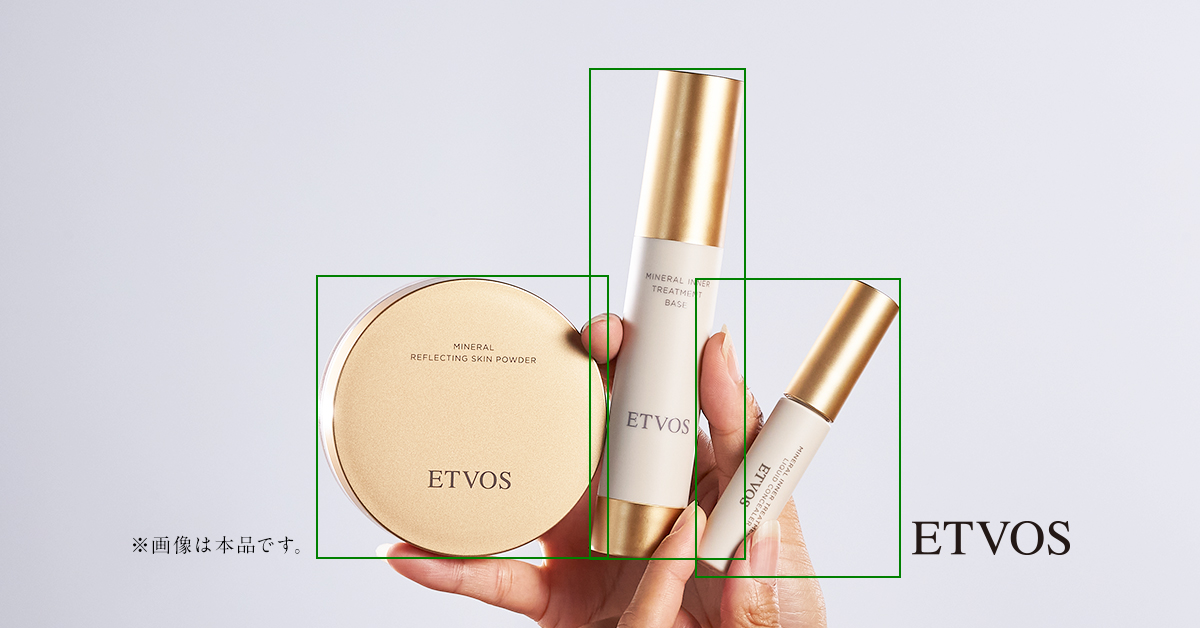

In [13]:
draw_bboxes(image=image, bboxes=text2segment_output.text2bbox_output.bboxes)

In [19]:
text2segment_output.text2bbox_output

Text2BboxOutput(bboxes=[[695.0977783203125, 278.6062316894531, 900.8260498046875, 577.7116088867188], [316.8478088378906, 275.81988525390625, 608.384521484375, 558.1869506835938], [589.9786376953125, 68.82951354980469, 745.5341796875, 559.0375366210938]])

text2segment_output = text2segment_usecase.text2segment(
    text2segment_input=Text2SegmentInput(
        texts=[
            "MINERAL REFLECTING SKIN POWDER",
            "MINERAL INNER TREATMENT BASE",
            "MINERAL INNER TREATME LIQUID CONCEALER",
        ],
        image=image,
        detector_type=DetectorType.FLORENCE2,
        segmenter_type=SegmenterType.SAM2,
    )
)

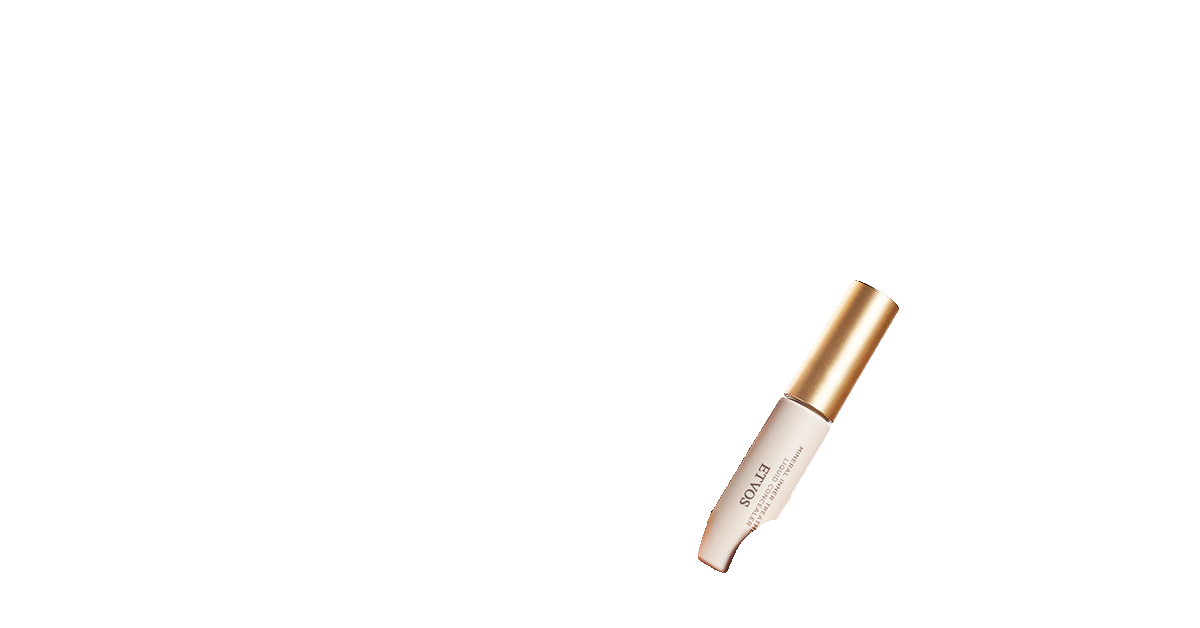

In [14]:
left_image = image.copy()
left_image.putalpha(text2segment_output.masks[0])
left_image

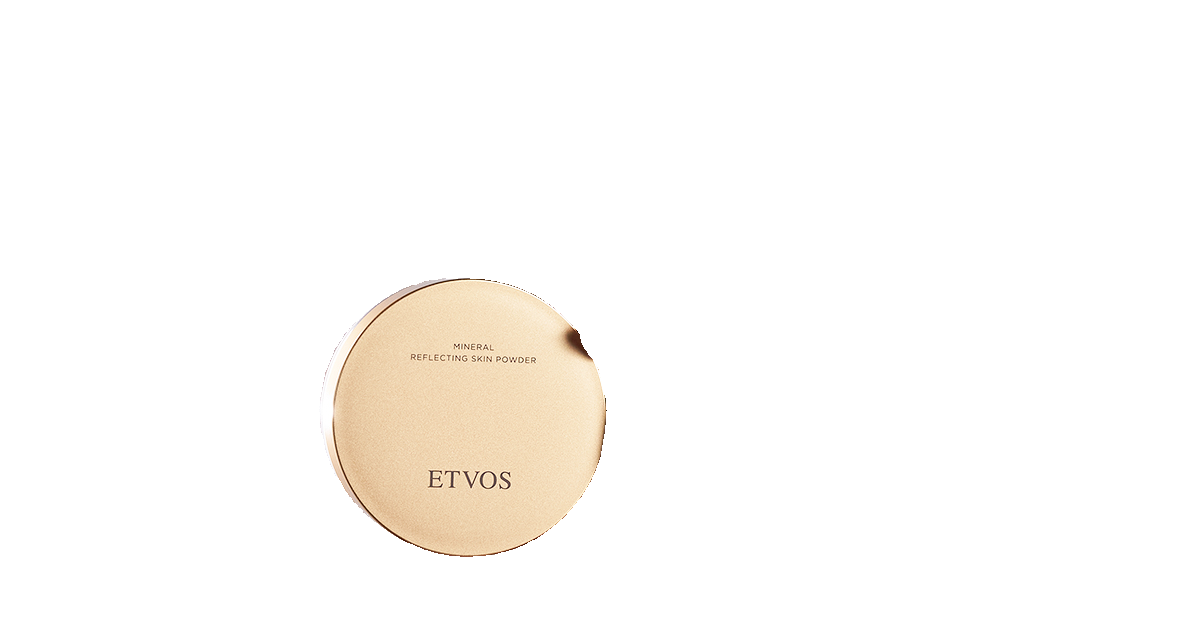

In [15]:
center_image = image.copy()
center_image.putalpha(text2segment_output.masks[1])
center_image

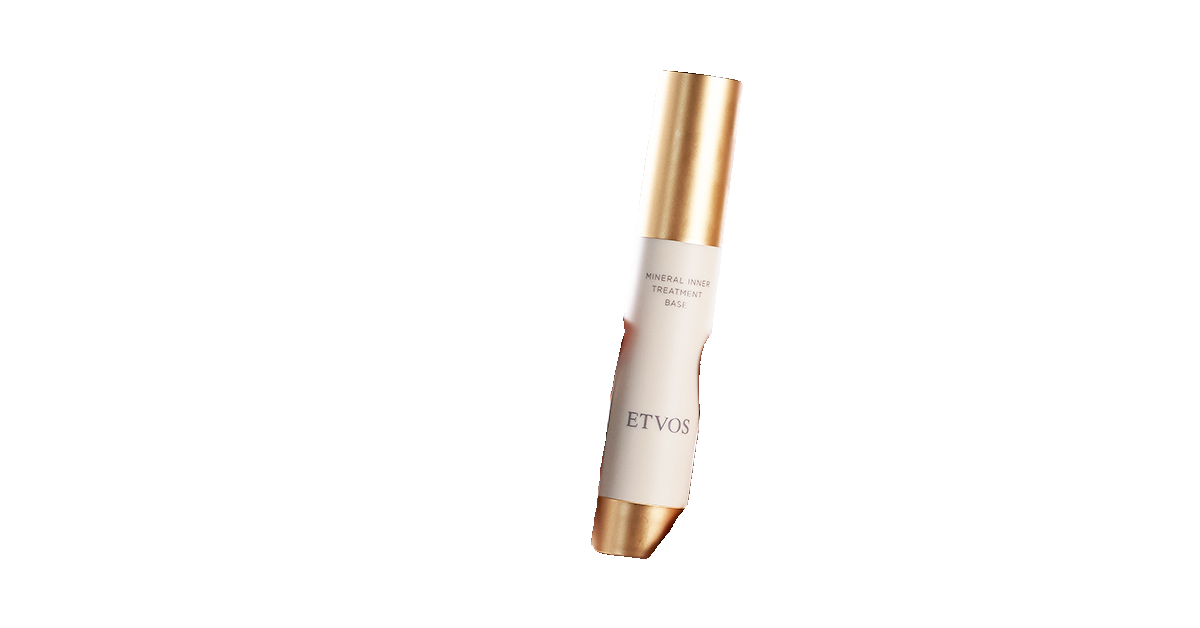

In [20]:
right_image = image.copy()
right_image.putalpha(text2segment_output.masks[2])
right_image
